In [1]:
%pylab inline

from importlib import reload

import scipy
from scipy import interpolate
import skimage

import torch

import spline

Populating the interactive namespace from numpy and matplotlib


(48, 32)


C:\Users\kkc29\AppData\Local\Temp\1/ipykernel_89704/1027288082.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  image = skimage.data.human_mitosis()[112:160, 96:128].astype(np.float)


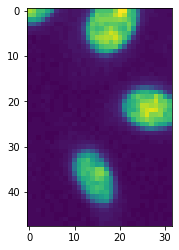

In [2]:
image = skimage.data.human_mitosis()[112:160, 96:128].astype(np.float)
imshow(image)
print(image.shape)

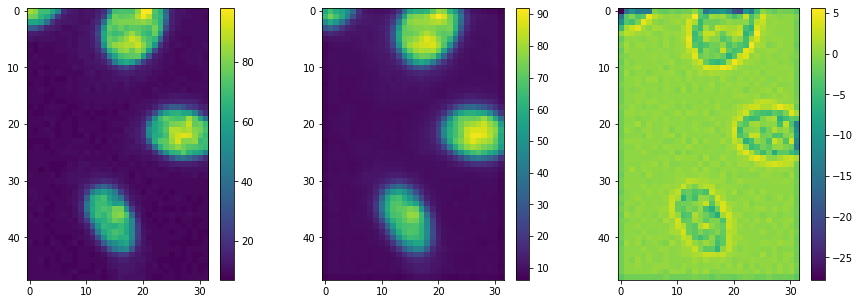

In [3]:
reload(spline)
spline_model = spline.Spline2D(image, k=3, fit_image=False)

image_interpolated = spline_model.render(1)

fig, axes = subplots(1, 3, figsize=(15, 5))
im = axes[0].imshow(image)
colorbar(im, ax=axes[0])
im = axes[1].imshow(image_interpolated)
colorbar(im, ax=axes[1])
im = axes[2].imshow(image_interpolated-image)
colorbar(im, ax=axes[2])

Fitting...


C:\Users\kkc29\Anaconda3\envs\smlm-dl\lib\site-packages\torch\autograd\__init__.py:154: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:112.)
  Variable._execution_engine.run_backward(


Final loss: 2.1557411855610553e-08


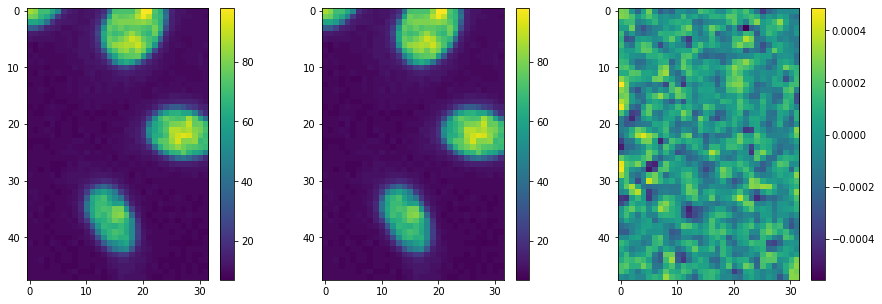

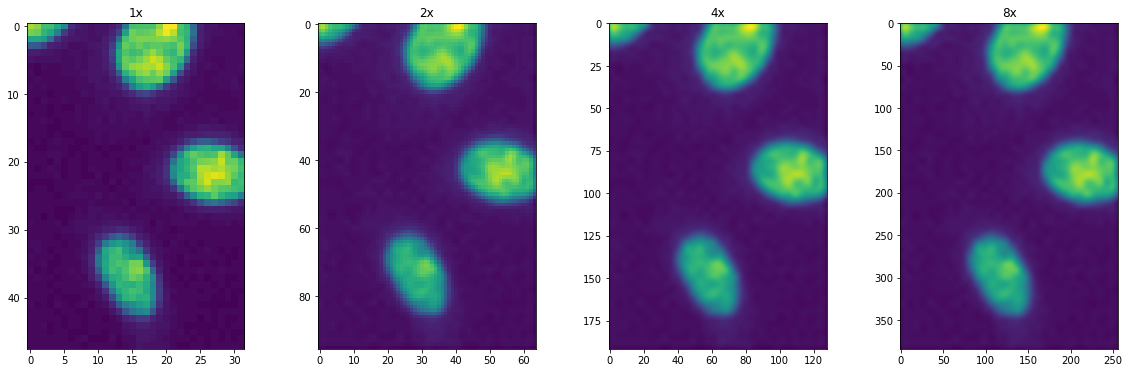

In [4]:
reload(spline)
spline_model = spline.Spline2D(image, k=3, fit_image=True)

image_interpolated = spline_model.render(1)

fig, axes = subplots(1, 3, figsize=(15, 5))
im = axes[0].imshow(image)
colorbar(im, ax=axes[0])
im = axes[1].imshow(image_interpolated)
colorbar(im, ax=axes[1])
im = axes[2].imshow(image_interpolated-image)
colorbar(im, ax=axes[2])

fig, axes = subplots(1, 4, figsize=(20, 6))
for i in range(4):
    axes[i].imshow(spline_model.render(2**i))
    axes[i].set_title("{}x".format(2**i))

(48, 32)
Fitting...
Final loss: 2.1557411855610553e-08


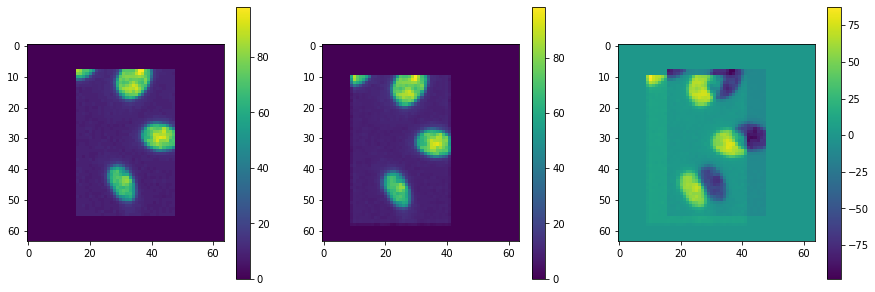

In [5]:
reload(spline)
print(image.shape)
spline_model = spline.Spline2D(image, k=3, out_size=(64,64), fit_image=True)

x = dict()
x['x'] = (torch.randn((128*128, 1, 1, 1)) - 0.5) * 10
x['y'] = (torch.randn((128*128, 1, 1, 1)) - 0.5) * 10
image_interpolated = spline_model(x)

padded_image = np.pad(image, ((8, 8), (16, 16)))
fig, axes = subplots(1, 3, figsize=(15, 5))
im = axes[0].imshow(padded_image)
colorbar(im, ax=axes[0])
im = axes[1].imshow(image_interpolated[0,0].detach())
colorbar(im, ax=axes[1])
im = axes[2].imshow(image_interpolated[0,0].detach()-padded_image)
colorbar(im, ax=axes[2])

In [6]:
reload(spline)
spline.test_calculate_bspline_basis_fast_mode()

PASSED all 1000 runs.
